In [1]:
import numpy as np
from scipy.signal import lfilter
from scipy.special import sinc
import matplotlib.pyplot as plt

In [2]:
# Create input signal
f1 = 1e3
T1 = 1/f1
fs = 12*f1
Ts = 1/fs;
tlen = 61*T1
t = np.arange(0, tlen + 2*Ts + 1e-12, Ts)
x = np.sin(2*np.pi*f1*t)

In [3]:
# Downsampling Ratio
M = 2

In [4]:
# Create filter
fcf = f1*2
Omegacf = 2*np.pi*fcf/fs
N = M*11
n = np.arange(0,N) - np.floor(N/2)
h = Omegacf/np.pi * np.sinc(n*Omegacf/np.pi)

In [5]:
# Non-Polyphase (Inefficient) Anti-Aliasing Filtering + Decimation
y = lfilter(h, [1], x) 
y_dec = y[::M] 

In [6]:
# Polyphase Filter Coefficient Selection
p0 = h[::M]
p1 = h[1::M]

In [7]:
# Polyphase Signal Selection
x0 = x[::M]
x1 = np.concatenate(([0], x[1::M]))

In [8]:
# Polyphase Filtering
y_poly_dec = lfilter(p0, [1], x0) + lfilter(p1, [1], x1)

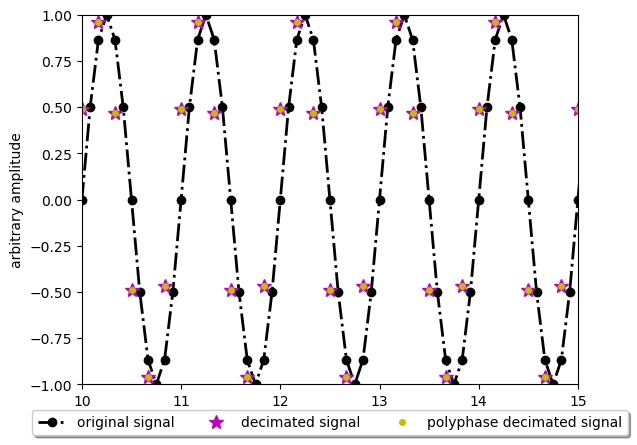

In [9]:
# Plotting
plt.plot(t*1e3,x,'ko-.',linewidth=2,label='original signal')
plt.plot(t[::M]*1e3,y_dec,'m*',markersize=10,linewidth=4,label='decimated signal')
plt.plot(t[::M]*1e3,y_poly_dec,'y.',markersize=8,linewidth=1,label='polyphase decimated signal')
plt.xlabel('time, ms')
plt.ylabel('arbitrary amplitude')
plt.axis([10,15,-1,1])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.show()